In [3]:
import pandas as pd

In [18]:
df = pd.read_csv('/Users/hirdeshpal/Downloads/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [46]:
# X or input  = df.iloc[:,3]
inputs = df.drop('salary_more_then_100k',axis = 'columns')

# y or target = df.iloc[:,0:3]
target = df['salary_more_then_100k']

In [48]:
# As input or X is in string so need to convert the same into numbers for the ml to undrstand

from sklearn.preprocessing import LabelEncoder

In [54]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [56]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [62]:
inputs_n = inputs.drop(['company','job','degree'], axis = 'columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
# not using x_train and y_train, you can use and split the dataset
model = DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [74]:
model.score(inputs_n,target)

1.0

In [76]:
model.predict([[2,2,1]])

/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [80]:
model.predict([[1,0,0]])

/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

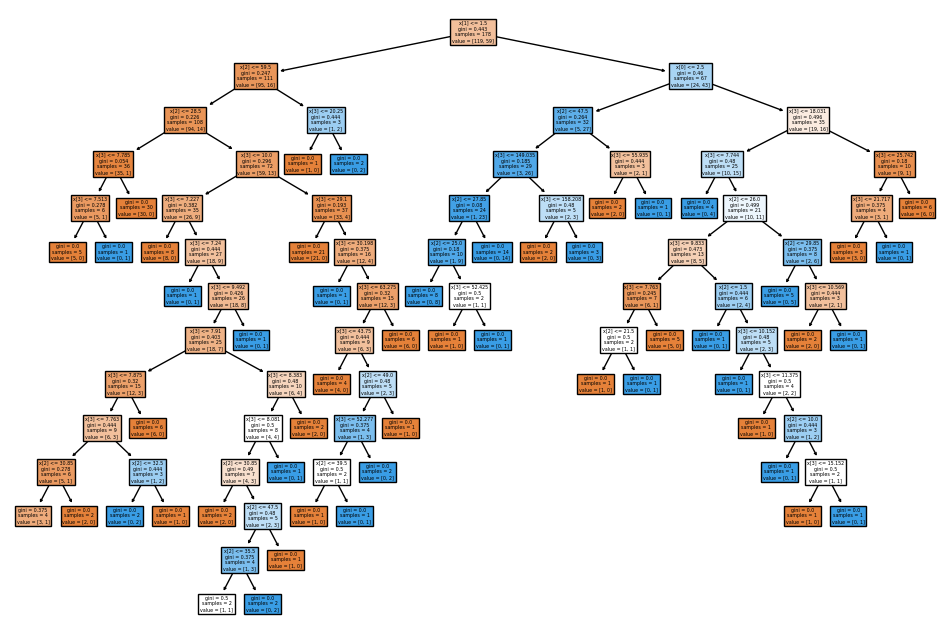

In [127]:
# Plot the decision tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))

plot_tree(Model,filled=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

# Excercise
#### Predicting survival on the Titanic dataset

In [69]:
import pandas as pd
df = pd.read_csv('/Users/hirdeshpal/Downloads/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns',inplace=True)

In [31]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [57]:
df.Sex = df.Sex.map({'male':1,'female':2})
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,2,38.000000,71.2833
2,1,3,2,26.000000,7.9250
3,1,1,2,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,2,19.000000,30.0000
888,0,3,2,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [59]:
X = df.drop('Survived',axis = 'columns')

In [61]:
y = df.Survived

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2)
Model = DecisionTreeClassifier()
Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
Model.score(X_test,y_test)

0.7138849929873773

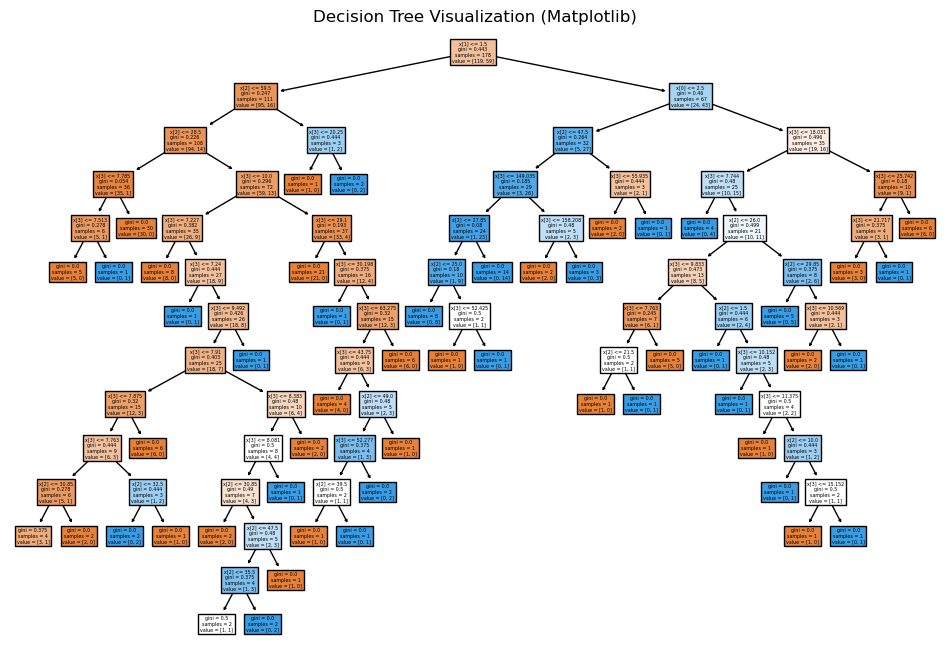

In [97]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the decision tree using Matplotlib
plot_tree(Model, filled=True)

# Add title
plt.title("Decision Tree Visualization (Matplotlib)")

# Show the plot
plt.show()
